In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('WineQT.csv', usecols=[2,10,11])
df.sample(3)

,citric acid,alcohol,quality
857,0.02,10.4,6
1104,0.30,11.4,8
108,0.42,10.5,5


In [6]:
df.columns=['quality', 'alcohol', 'citric acid']
df

,quality,alcohol,citric acid
0,0.00,9.4,5
1,0.00,9.8,5
2,0.04,9.8,5
3,0.56,9.8,6
4,0.00,9.4,5
...,...,...,...
1138,0.13,11.0,6
1139,0.08,9.5,6
1140,0.08,10.5,5
1141,0.10,11.2,6


<Axes: xlabel='alcohol', ylabel='Density'>

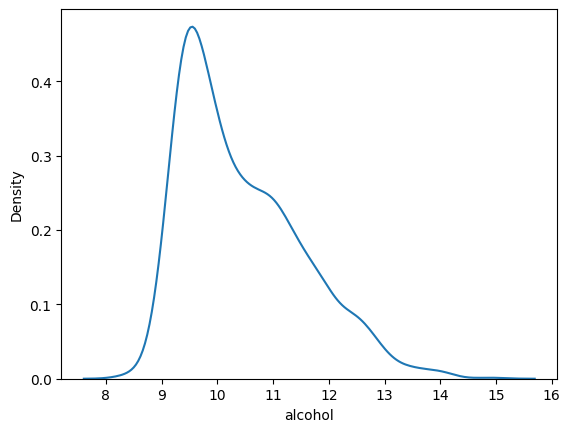

In [7]:
sns.kdeplot(df['alcohol'])

<Axes: xlabel='citric acid', ylabel='Density'>

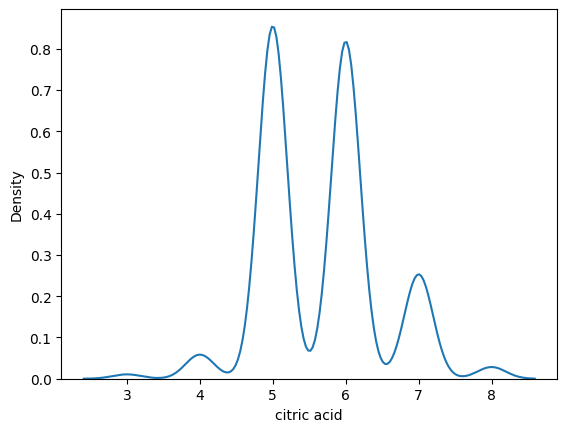

In [8]:
sns.kdeplot(df['citric acid'])

In [18]:
import seaborn as sns

color_dict = {1: 'red', 2: 'green', 3: 'blue'}
sns.scatterplot(x=df['alcohol'], y=df['citric acid'], hue=df['quality'], palette=color_dict)


ValueError: The palette dictionary is missing keys: {0.0, 0.24, 0.25, 0.5, 0.26, 0.51, 0.76, 0.54, 0.79, 0.75, 0.59, 0.68, 0.11, 0.27, 0.52, 0.36, 0.61, 0.21, 0.22, 0.23, 0.09, 0.1, 0.38, 0.63, 0.13, 0.3, 0.47, 0.72, 0.08, 0.56, 0.4, 0.65, 0.07, 0.32, 0.49, 0.74, 0.58, 0.18, 0.19, 0.2, 0.42, 0.43, 0.44, 0.45, 0.46, 0.41, 0.67, 0.34, 0.35, 0.6, 0.05, 0.69, 0.04, 0.28, 0.53, 0.12, 0.37, 0.62, 0.29, 0.15, 0.17, 0.16, 0.03, 0.55, 0.02, 0.39, 0.64, 0.14, 0.06, 0.31, 0.48, 0.73, 0.57, 0.01, 0.66, 0.33}

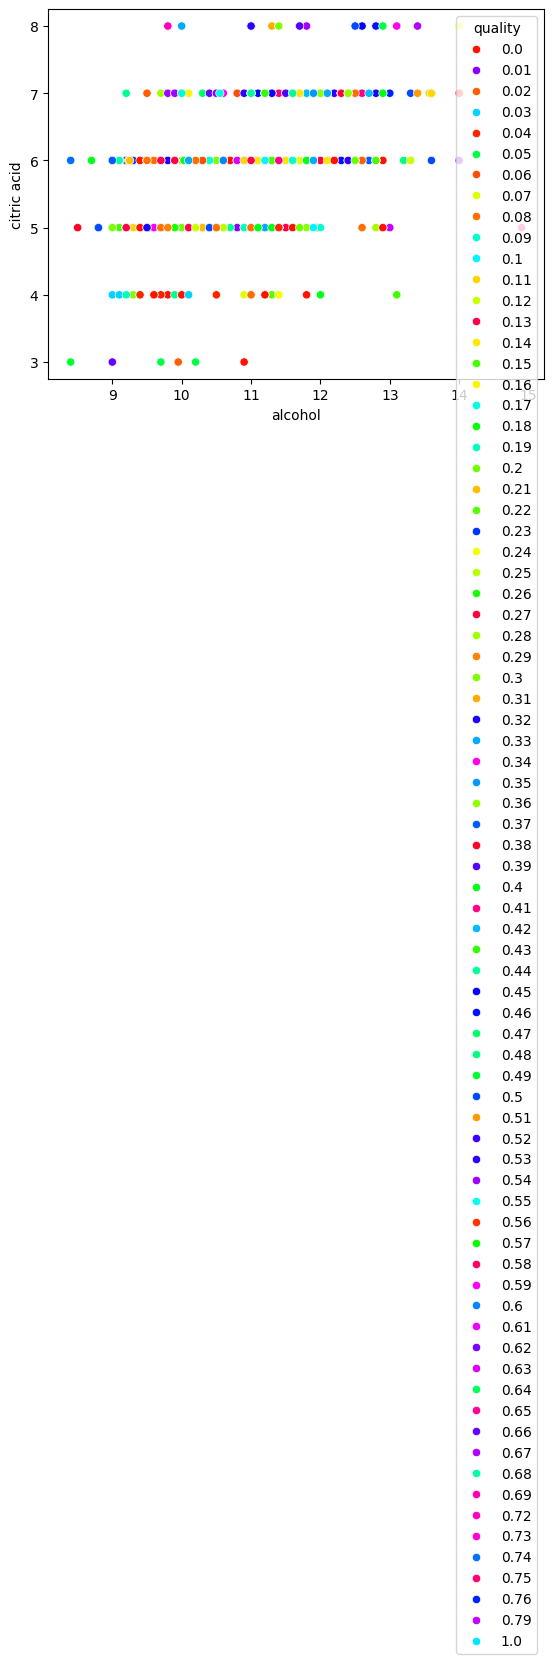

In [19]:
sns.scatterplot(x=df['alcohol'], y=df['citric acid'], hue=df['quality'],
                palette=dict(zip(df['quality'].unique(), sns.color_palette("hsv", df['quality'].nunique()))))
plt.show()

In [21]:
df.sample()

,quality,alcohol,citric acid
379,0.24,10.3,6


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('quality', axis=1),
                                                    df['quality'],
                                                    test_size=0.3,
                                                    random_state=0)
x_train.shape, x_test.shape

((800, 2), (343, 2))

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)



In [29]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [30]:
np.round(x_train.describe(), 1)

,alcohol,citric acid
count,800.0,800.0
mean,10.5,5.7
std,1.1,0.8
min,8.4,3.0
25%,9.5,5.0
50%,10.2,6.0
75%,11.2,6.0
max,14.9,8.0


In [31]:
np.round(x_train_scaled.describe(), 1)

,alcohol,citric acid
count,800.0,800.0
mean,0.3,0.5
std,0.2,0.2
min,0.0,0.0
25%,0.2,0.4
50%,0.3,0.6
75%,0.4,0.6
max,1.0,1.0


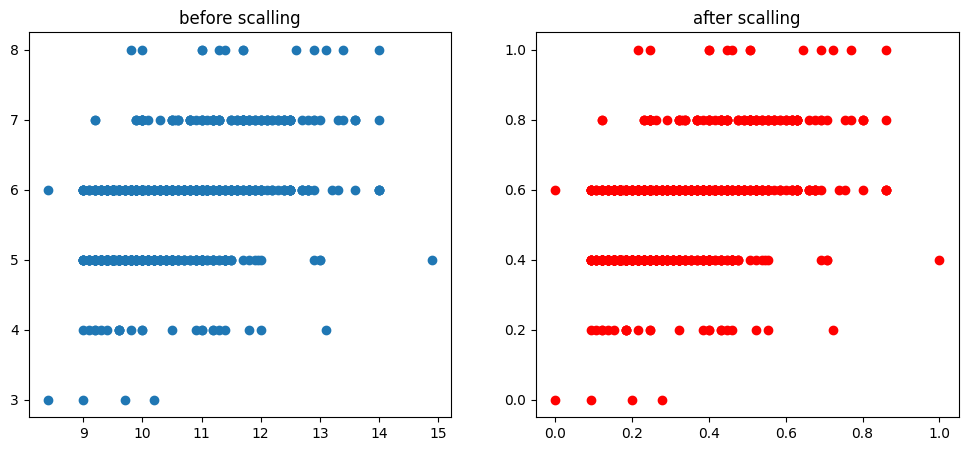

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['alcohol'], x_train['citric acid'])
ax1.set_title('before scalling')
ax2.scatter(x_train_scaled['alcohol'], x_train_scaled['citric acid'] ,color='red')
ax2.set_title('after scalling')
plt.show()

<Axes: title={'center': 'before scaling'}, xlabel='alcohol', ylabel='Density'>

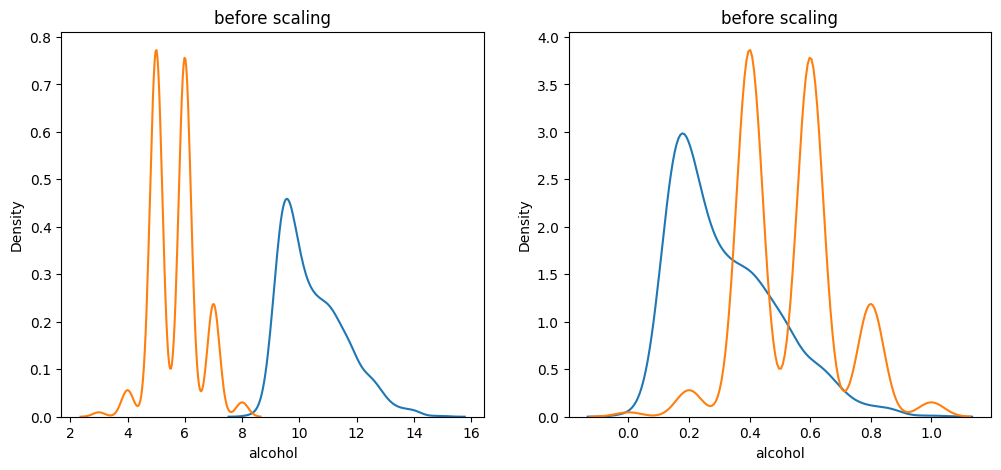

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('before scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)
sns.kdeplot(x_train['citric acid'], ax=ax1)

ax2.set_title('before scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['citric acid'], ax=ax2)

<Axes: title={'center': 'after scaling'}, xlabel='alcohol', ylabel='Density'>

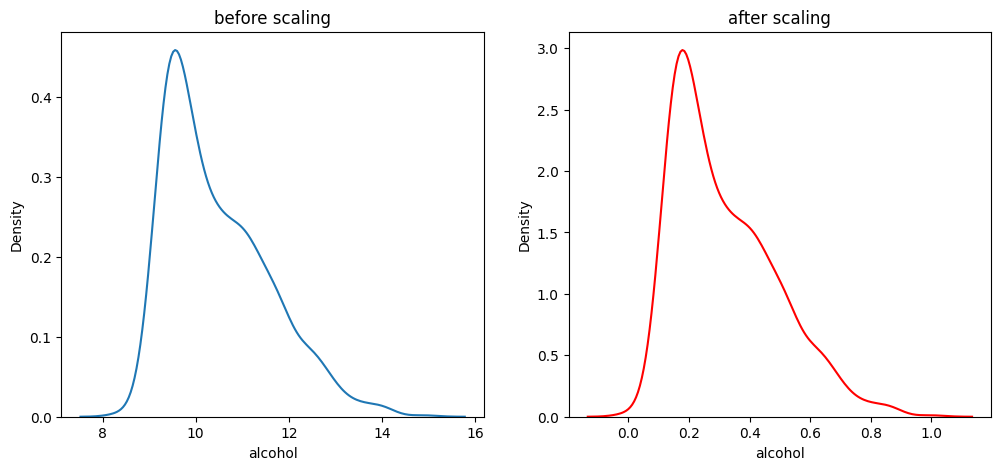

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('before scaling')
sns.kdeplot(x_train['alcohol'], ax=ax1)

ax2.set_title('after scaling')
sns.kdeplot(x_train_scaled['alcohol'], ax=ax2 , color='red')

<Axes: title={'center': 'after scaling'}, xlabel='citric acid', ylabel='Density'>

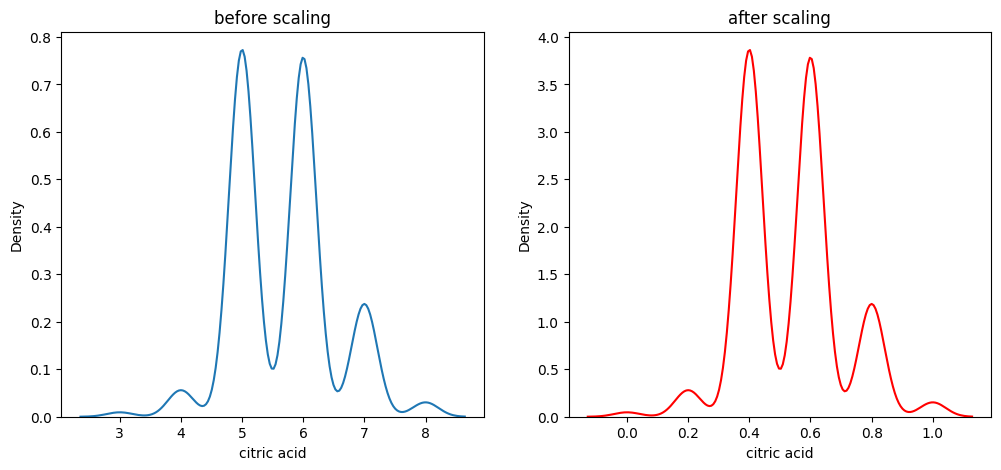

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('before scaling')
sns.kdeplot(x_train['citric acid'], ax=ax1)

ax2.set_title('after scaling')
sns.kdeplot(x_train_scaled['citric acid'], ax=ax2 , color='red')